In [1]:
pip install cvxpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
N = 300
x_k = np.linspace(-3, 3, N)
p = cp.Variable(N)

In [4]:
objective = cp.Minimize(0)

In [5]:
constraints = [
    cp.sum(p) == 1,
    p @ x_k == 0,
    p @ cp.power(x_k, 2) == 1,
    p @ cp.power(x_k, 3) == 1,
    p >= 0,
    p[0] == random.uniform(0.0001, 0.001) # Randomness to generate new probability distributions each time
]

In [6]:
problem = cp.Problem(objective, constraints)
result = problem.solve()

A random p.m.f is: (interpolated by matplotlib)

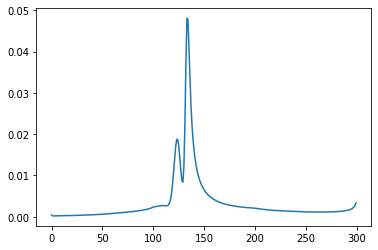

In [7]:
plt.plot(p.value)

A random c.d.f. is:

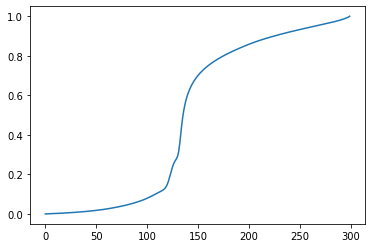

In [8]:
plt.plot(np.cumsum(p.value))

In [9]:
summe = 0

run = 0
while summe <= .5:
  summe += p.value[run]
  run +=1

print("Median is", x_k[run], "at index", run)

Median is -0.25083612040133785 at index 137
